In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from wordcloud import WordCloud
import numpy as np
import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation as LdaModel
from sklearn.decomposition import NMF 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdoa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdoa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv('bbc-news-data.csv',sep='\t')
data.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
# get all information about data befor processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [ ]:
# combine title and content in Text
data['Text']= data['title'] +" "+ data['content']

In [ ]:
# see sample of text after Text
data['Text'][1622]

'Wales make two changes for France  Wales coach Mike Ruddock has made two changes from the team that beat Italy 38-8 for Saturday\'s trip to France.  Kevin Morgan takes over from his injured Newport-Gwent Dragons colleague Hal Luscombe on the right wing. And in the pack Neath-Swansea Ospreys forward Ryan Jones is preferred at blindside flanker to Jonathan Thomas. Thomas, a try-scorer in Rome, drops down to the bench instead of Ian Gough, while Cardiff back Rhys Williams steps up in place of Morgan. Luscombe is sidelined by a hamstring problem sustained during the Six Nations game against Italy last weekend.  However, the experienced and in-form Morgan was already pushing hard for a start at Stade de France. "Due to his impressive performances from the bench, Kevin was very much in the selection mix anyway, and the unfortunate injury to Hal gives him the chance to start," said Ruddock. "Now that Ryan Jones has recovered from injury, we have increased the options in the back row. "Jonath

In [ ]:
# have describtion about Data
data.describe()

,category,filename,title,content,Text
count,2225,2225,2225,2225,2225
unique,5,511,2096,2092,2127
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...,Ray DVD beats box office takings Oscar-nomina...
freq,511,5,2,2,2


In [ ]:
# clean data
data.drop(columns=['filename','title','content'],axis=1 ,inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# get information after clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2127 non-null   object
 1   Text      2127 non-null   object
dtypes: object(2)
memory usage: 33.4+ KB


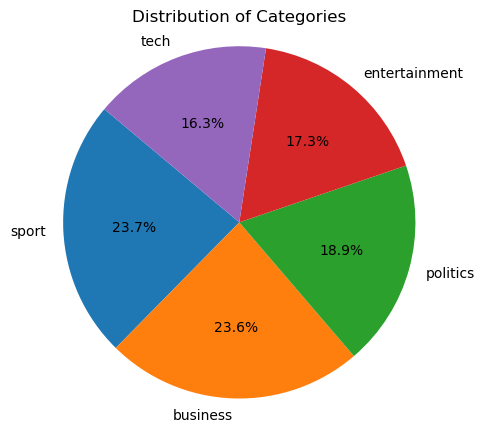

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(data['category'].value_counts(), labels=list(data['category'].value_counts().index), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  
plt.show()

In [ ]:
# function to processe Text in data
def text_processing(text):
    
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)

    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    text = ' '.join(tokens)

    return text

In [ ]:
# apply text processing
data['Text'] = data['Text'].apply(text_processing)

In [13]:
tfidf_victorize = TfidfVectorizer(max_df=0.95 , min_df= 2 , stop_words='english')
tfidf = tfidf_victorize.fit_transform(data['Text'])


In [ ]:
# number of feature 
len(tfidf_victorize.get_feature_names_out())

15243

In [ ]:
# get 15 word feature in data
for i in range(15):
    random_word_id = random.randint(0,len(tfidf_victorize.get_feature_names_out())-1)
    print(tfidf_victorize.get_feature_names_out()[random_word_id])

claire
smith
blurred
perfect
designed
misrepresentation
consumes
eating
plotting
manipulate
incorporating
lesser
mechanism
bullet
decisive


In [ ]:
# The model learns how words group into topics.
LDA = LdaModel(n_components=5,random_state=42)
LDA.fit(tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [17]:
len(LDA.components_), len(LDA.components_[0])

(5, 15243)

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_victorize.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['plan', 'howard', 'tax', 'people', 'lord', 'brown', 'minister', 'government', 'tory', 'blair', 'party', 'election', 'labour', 'said', 'mr']


THE TOP 15 WORDS FOR TOPIC #1
['final', 'race', 'play', 'seed', 'second', 'chelsea', 'goal', 'club', 'liverpool', 'arsenal', 'game', 'yukos', 'match', 'champion', 'win']


THE TOP 15 WORDS FOR TOPIC #2
['betsen', 'yannick', 'lvmh', 'dominici', 'lacroix', 'harinordoquy', 'adelaide', 'stade', 'toulousain', 'melzer', 'cartridge', 'dent', 'capriati', 'rochus', 'printer']


THE TOP 15 WORDS FOR TOPIC #3
['phone', 'price', 'mr', 'game', 'mobile', 'bank', 'new', 'people', 'sale', 'market', 'firm', 'company', 'year', 'bn', 'said']


THE TOP 15 WORDS FOR TOPIC #4
['france', 'injury', 'player', 'oscar', 'coach', 'actor', 'ireland', 'star', 'rugby', 'wale', 'game', 'best', 'england', 'award', 'film']




In [ ]:
# Converts each document into a topic probability distribution.
topic_result = LDA.transform(tfidf)

In [ ]:
# shape probability distribution
topic_result.shape

(2127, 5)

In [ ]:
# sample of probability distribution
topic_result[0].round()

array([0., 0., 0., 1., 0.])

In [23]:
data['Topic_LDA']= topic_result.argmax(axis=1)
data

,category,Text,Topic_LDA
0,business,ad sale boost time warner profit quarterly pro...,3
1,business,dollar gain greenspan speech dollar hit highes...,3
2,business,yukos unit buyer face loan claim owner embattl...,3
3,business,high fuel price hit ba profit british airway b...,3
4,business,pernod takeover talk lift domecq share uk drin...,3
...,...,...,...
2122,tech,new console promise big problem making game fu...,3
2123,tech,bt program beat dialler scam bt introducing tw...,3
2124,tech,careful code new european directive could put ...,3
2125,tech,u cyber security chief resigns man making sure...,3


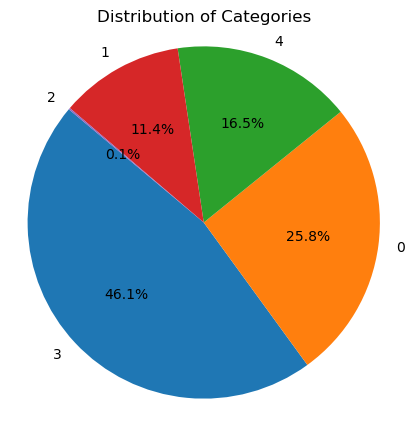

In [ ]:
# pie Visualization
plt.figure(figsize=(8, 8))
plt.pie(data['Topic_LDA'].value_counts(), labels=list(data['Topic_LDA'].value_counts().index), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  
plt.show()

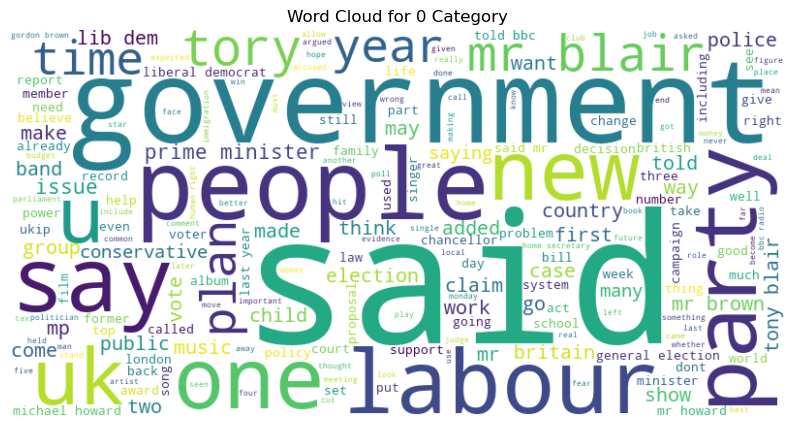

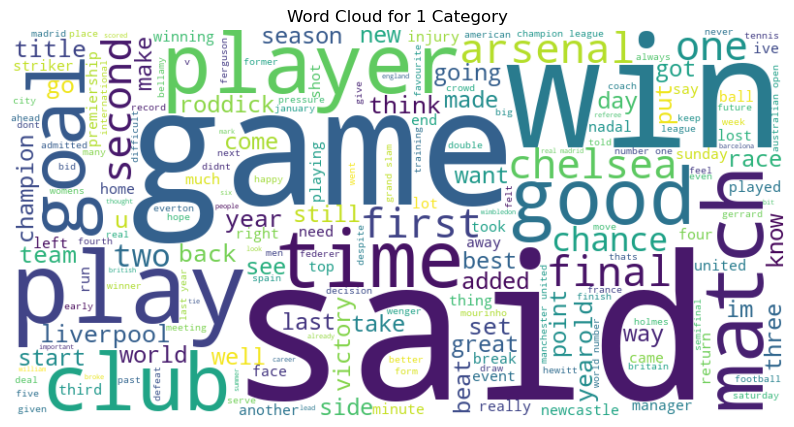

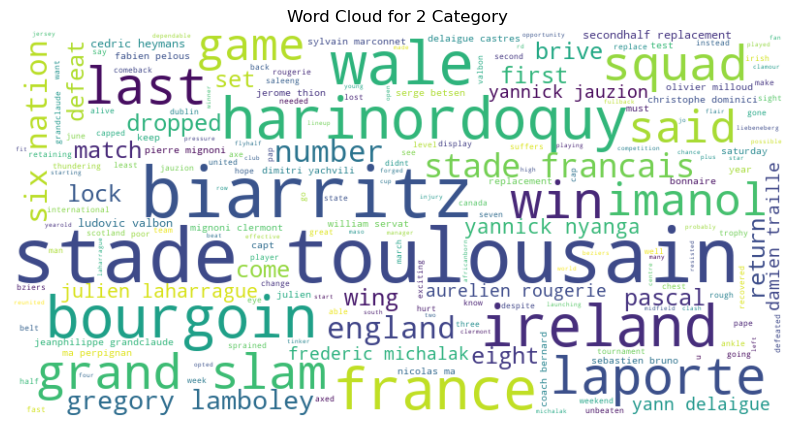

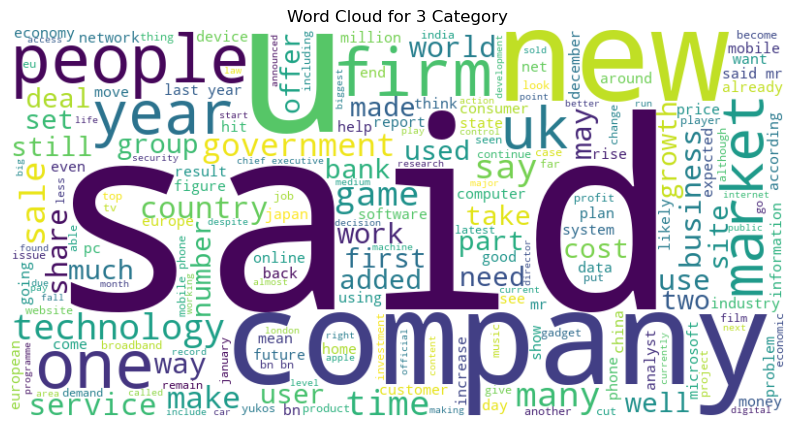

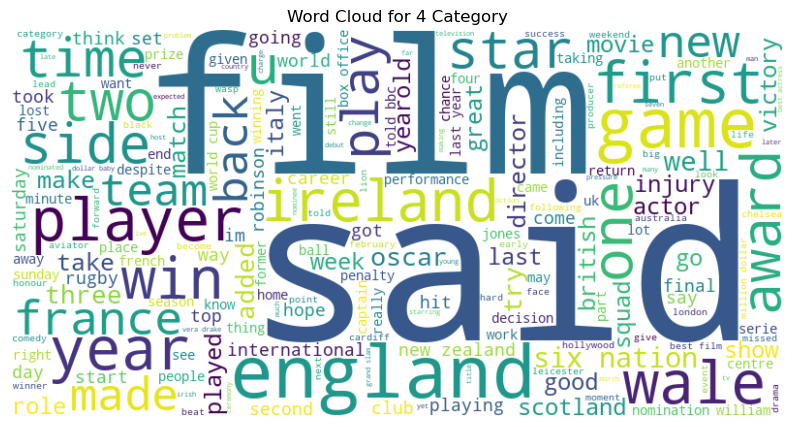

In [ ]:
# Word Cloud Visualization
for i in range(0,len(LDA.components_)):
    text = ' '.join(data[data['Topic_LDA'] == i]['Text'])
    if len(text.strip()) == 0: 
        print(f"Skipping Topic_LDA {i}: No text available")
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {i} Category')
    plt.show()


In [ ]:
# pyLDAvis Visualization
doc_lengths = np.array([len(doc.split()) for doc in data['Text']])
term_frequency = np.array(tfidf.sum(axis=0)).flatten()
vis = pyLDAvis.prepare(
        topic_term_dists=LDA.components_ / LDA.components_.sum(axis=1)[:, np.newaxis],
        doc_topic_dists=topic_result,
        doc_lengths=doc_lengths,
        vocab=tfidf_victorize.get_feature_names_out(),
        term_frequency=term_frequency
    )

In [28]:
pyLDAvis.save_html(vis, 'lda_visualization.html')
pyLDAvis.display(vis)

In [ ]:
# The model learns how words group into topics.
model_NMF = NMF(n_components=5 , random_state=42)
model_NMF.fit(tfidf)

NMF(n_components=5, random_state=42)

In [30]:
len(model_NMF.components_),len(model_NMF.components_[0])

(5, 15243)

In [31]:
for index,topic in enumerate(model_NMF.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_victorize.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['coach', 'club', 'rugby', 'injury', 'play', 'ireland', 'cup', 'team', 'said', 'match', 'wale', 'win', 'player', 'england', 'game']


THE TOP 15 WORDS FOR TOPIC #1
['plan', 'chancellor', 'prime', 'howard', 'minister', 'government', 'tax', 'said', 'brown', 'tory', 'party', 'blair', 'election', 'labour', 'mr']


THE TOP 15 WORDS FOR TOPIC #2
['share', 'firm', 'economic', 'oil', 'company', 'market', 'year', 'price', 'sale', 'rate', 'bank', 'said', 'economy', 'growth', 'bn']


THE TOP 15 WORDS FOR TOPIC #3
['movie', 'aviator', 'comedy', 'year', 'prize', 'nomination', 'director', 'actress', 'festival', 'star', 'actor', 'oscar', 'best', 'award', 'film']


THE TOP 15 WORDS FOR TOPIC #4
['tv', 'computer', 'game', 'net', 'network', 'broadband', 'digital', 'user', 'said', 'service', 'music', 'technology', 'people', 'phone', 'mobile']




In [ ]:
# Converts each document into a topic probability distribution.
topic_result_NMF = model_NMF.transform(tfidf)

In [ ]:
# shape probability distribution
topic_result_NMF.shape

(2127, 5)

In [ ]:
# sample of probability distribution
topic_result_NMF[0].round()

array([0., 0., 0., 0., 0.])

In [35]:
data['Topic_NMF']= topic_result_NMF.argmax(axis=1)
data

,category,Text,Topic_LDA,Topic_NMF
0,business,ad sale boost time warner profit quarterly pro...,3,2
1,business,dollar gain greenspan speech dollar hit highes...,3,2
2,business,yukos unit buyer face loan claim owner embattl...,3,2
3,business,high fuel price hit ba profit british airway b...,3,2
4,business,pernod takeover talk lift domecq share uk drin...,3,2
...,...,...,...,...
2122,tech,new console promise big problem making game fu...,3,4
2123,tech,bt program beat dialler scam bt introducing tw...,3,4
2124,tech,careful code new european directive could put ...,3,4
2125,tech,u cyber security chief resigns man making sure...,3,4


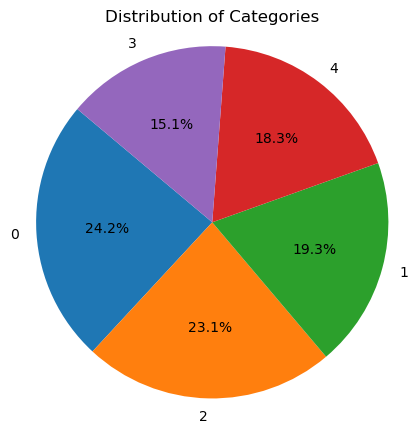

In [ ]:
# pie Visualization
plt.figure(figsize=(5, 5))
plt.pie(data['Topic_NMF'].value_counts(), labels=list(data['Topic_NMF'].value_counts().index), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  
plt.show()

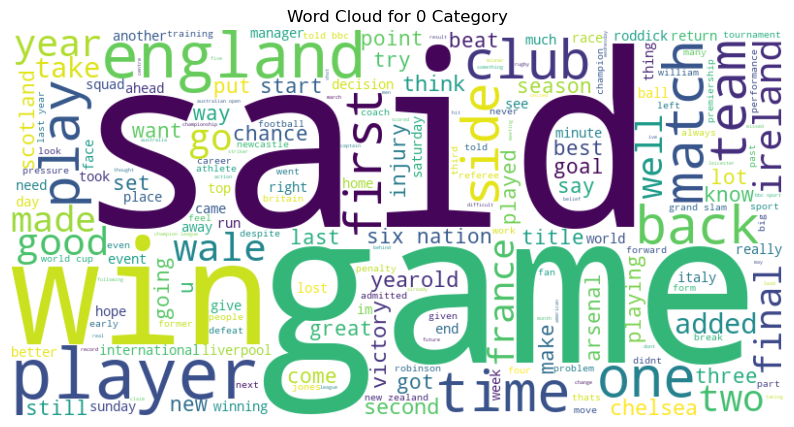

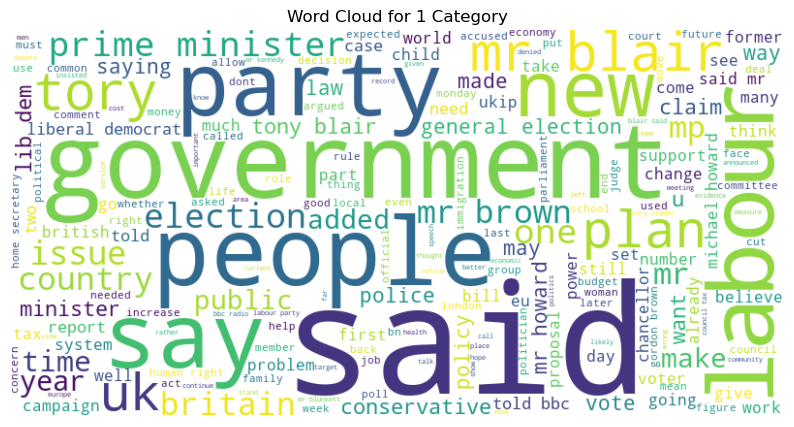

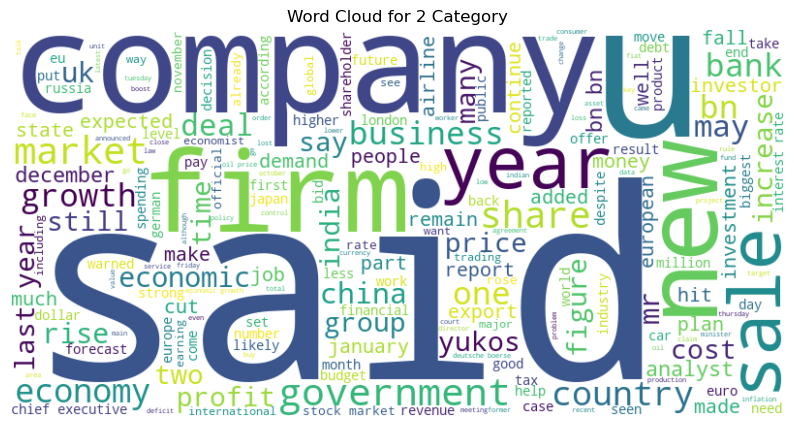

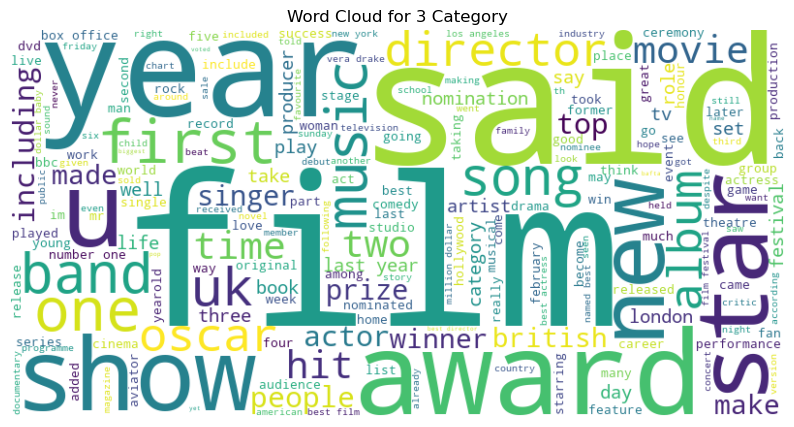

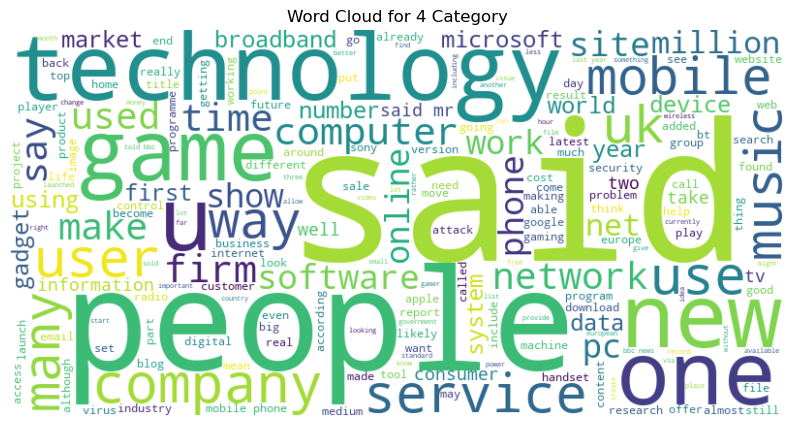

In [ ]:
# Word Cloud Visualization
for i in range(0,len(model_NMF.components_)):
    text = ' '.join(data[data['Topic_NMF'] == i]['Text'])
    if len(text.strip()) == 0: 
        print(f"Skipping Topic_NMF {i}: No text available")
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {i} Category')
    plt.show()
